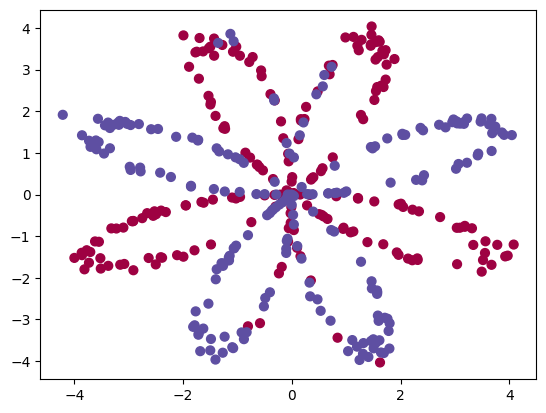

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn

def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y


X, Y = load_planar_dataset()

# Visualize the data:

plt.scatter(X[0, :], X[1, :], c = Y, s = 40, cmap = plt.cm.Spectral);


In [2]:
# X --> input dataset of shape (input size, number of examples)
# Y --> labels of shape (output size, number of examples)

W1 = np.random.randn(4, X.shape[0]) * 0.01
b1 = np.zeros(shape =(4, 1))

W2 = np.random.randn(Y.shape[0], 4) * 0.01
b2 = np.zeros(shape =(Y.shape[0], 1))


In [3]:
def forward_propagation(X, W1, W2, b1, b2):

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    # here the cache is the data of previous iteration
    # This will be used for backpropagation
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache


In [4]:
# Here Y is actual output
def compute_cost(A2, Y):
    m = Y.shape[1]

    # implementing the above formula

    cost = -(1/m)*np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))

    # Squeezing to avoid unnecessary dimensions
    cost = np.squeeze(cost)
    return cost


In [5]:
def back_propagation(W1, b1, W2, b2, cache, learning_rate):

    # Retrieve also A1 and A2 from dictionary "cache"
    A1 = cache['A1']
    A2 = cache['A2']

    m = Y.shape[1]

    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)

    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)

    # Updating the parameters according to algorithm
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    return W1, W2, b1, b2


In [6]:
# Please note that the weights and bias are global
# Here iterations is epochs

iterations = 10000
learning_rate = 0.01

for i in range(0, iterations):
    # Forward propagation. Inputs: "X, parameters". return: "A2, cache".
    A2, cache = forward_propagation(X, W1, W2, b1, b2)

    # Cost function. Inputs: "A2, Y". Outputs: "cost".
    cost = compute_cost(A2, Y)

    # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
    W1, W2, b1, b2 = back_propagation(W1, b1, W2, b2, cache, learning_rate)

    # Print the cost every 1000 iterations
    if(i%(iterations/10) == 0):
        print("cost after ", i, "iteration is : ", cost)



cost after  0 iteration is :  0.6931125167719424
cost after  1000 iteration is :  0.690769022988963
cost after  2000 iteration is :  0.6796765214894879
cost after  3000 iteration is :  0.6664456671632039
cost after  4000 iteration is :  0.642080989446702
cost after  5000 iteration is :  0.6244000348842776
cost after  6000 iteration is :  0.6139285677885676
cost after  7000 iteration is :  0.5924678485570568
cost after  8000 iteration is :  0.5225076248975543
cost after  9000 iteration is :  0.4588374978872447


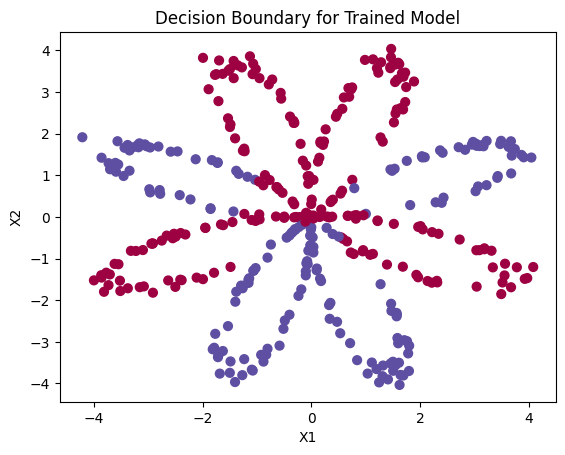

In [8]:


# After training, use the trained weights to predict
A2, _ = forward_propagation(X, W1, W2, b1, b2)

# Convert probabilities to class predictions (0 or 1)
predictions = (A2 > 0.5)



plt.scatter(X[0, :], X[1, :], c=predictions, s=40, cmap=plt.cm.Spectral)
plt.title("Decision Boundary for Trained Model")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
